## Predicting song popularity using Machine Learning

This notebook looks into using various Python-based Machine Learning and Data Science libraries in an attempt to build a machine learning model capable of predicting a popularity of the song based on the song's attributes.

*Approach:*

* Problem definition
* Data 
* Evaluation
* Features
* Modelling
* Experimentation 

### 1. Problem definiton

> Can we predict the popularity of a song based on its attributes?

### 2. Data

This study combines 3 datasets.

* Spotify Top 100 Songs of 2010-2019
The first dataset features top 100 songs on Spotify from 2010 to 2019. It contains 17 attributes, including the predicted attribute. 
Datasaet is available on Kaggle: https://www.kaggle.com/datasets/muhmores/spotify-top-100-songs-of-20152019

* Spotify Top 50 Songs 2020 Songs
The second dataset includes the data on top 50 songs on spotify from 2020. It contains 12 attributes, including the predicted attribute.
The dataset is available on Kaggle: https://www.kaggle.com/datasets/heminp16/spotify-top-2020-songs 

* Spotify Top 50 songs in 2021
The third dataset features top 50 songs on Spotify from 2021, and 14 characteristic variables of them. 
The dataset is available on Kaggle: https://www.kaggle.com/datasets/equinxx/spotify-top-50-songs-in-2021

### 3. Evaluation
> ???

### Features

Attribute Information:

#### 2011-2019 dataset:
* **title:**	          Song's Title
* **artist:**	      Song's artist
* **genre:**	          Genre of song
* **yearreleased:**	  Year the song was released
* **added:**	          Day song was added to Spotify's Top Hits playlist
* **bpm:**	          Beats Per Minute - The tempo of the song
* **nrgy:**          Energy - How energetic the song is
* **dnce:**	          Danceability - How easy it is to dance to the song
* **dB:**	          Decibel - How loud the song is
* **live:**	          How likely the song is a live recording
* **val:**	          How positive the mood of the song is
* **dur:**	          Duration of the song
* **acous:**	          How acoustic the song is
* **spch:**	          The more the song is focused on spoken word
* **pop:**	          Popularity of the song (not a ranking)
* **top year:**	      Year the song was a top hit
* **artist type:**	  Tells if artist is solo, duo, trio, or a band

#### 2020 dataset:
* **Top Genre:**	          Genre of the song
* **Year:**	      release year of the song
* **BPM:**	          Beats Per Minute - The tempo of the song
* **Energy:**	  The energy of the song; the higher the value, the more energetic
* **Danceability:**	          Describes how suitable a track is for dancing; the higher the value, the easier it is to dance
* **Loudness(dB):**	          The loudness level in decibels, higher the value, the louder the song
* **Liveness:**          the higher the value, the more likely the song is a live recording
* **dnce:**	          Danceability - How easy it is to dance to the song
* **Valence:**	          A measure of musical positiveness of the track. The tracks with the highest number give a sense of positive moods. 
* **Duration(sec):**	          The duration of the song in seconds.
* **Acousticness:**	          A measure of how acoustic the track is.
* **Speechiness:**	          The higher the value that tells how many spoken words were in the track. oken word
* **Popularity:**	          The higher the value, the more popular the song is.

#### 2021 dataset:
* **id:**	          Position of the song in the list
* **artist_name:**	      Name of artist
* **track_name:**	          Name of track
* **track_id:**	  Unique ID for the track in spotify
* **popularity:**	          The higher the value the more popular the song is
* **danceability:**	         The higher the value, the easier it is to dance to this song
* **energy:**          The energy of a song - the higher the value, the more energtic the song
* **key:**	          The key the track is in
* **loudness:**	          The higher the value, the louder the song
* **mode:**	          The modality (major or minor) of a track
* **speechiness:**	          The higher the value the more spoken word the song contains
* **acousticness:**	          The higher the value the more acoustic the song is
* **instrumentalness:**	         This represents the number of vocals in a song
* **liveness:**	          The higher the value, the more likely the song is a live recording
* **valence:**	          The higher the value, the more positive mood for the song
* **tempo:**	      Tempo of the song
* **duration_ms:**	  Duration of the song (in ms)
* **time_signature:**	  An estimated time signature

In [122]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [123]:
data_2010_2019 = pd.read_csv("data/Spotify 2010 - 2019 Top 100.csv",
                            parse_dates=["year released"])
data_2020 = pd.read_csv("data/Top2020.csv",
                       parse_dates=["year"])
data_2021 = pd.read_csv("data/spotify_top50_2021.csv")

### 2010-2019

In [124]:
data_2010_2019

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009-01-01,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010-01-01,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010-01-01,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010-01-01,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010-01-01,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019-01-01,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019-01-01,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
data_2010_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   title          1000 non-null   object        
 1   artist         1000 non-null   object        
 2   top genre      1000 non-null   object        
 3   year released  1000 non-null   datetime64[ns]
 4   added          1000 non-null   object        
 5   bpm            1000 non-null   float64       
 6   nrgy           1000 non-null   float64       
 7   dnce           1000 non-null   float64       
 8   dB             1000 non-null   float64       
 9   live           1000 non-null   float64       
 10  val            1000 non-null   float64       
 11  dur            1000 non-null   float64       
 12  acous          1000 non-null   float64       
 13  spch           1000 non-null   float64       
 14  pop            1000 non-null   float64       
 15  top year       1000 n

In [126]:
data_2010_2019.isna().sum()

title            3
artist           3
top genre        3
year released    3
added            3
bpm              3
nrgy             3
dnce             3
dB               3
live             3
val              3
dur              3
acous            3
spch             3
pop              3
top year         3
artist type      3
dtype: int64

In [127]:
data_2010_2019["pop"][:20]

0     70.0
1     68.0
2     72.0
3     80.0
4     79.0
5     71.0
6     75.0
7     71.0
8     87.0
9     86.0
10    71.0
11    69.0
12    74.0
13    74.0
14    55.0
15    55.0
16    72.0
17    70.0
18    61.0
19    71.0
Name: pop, dtype: float64

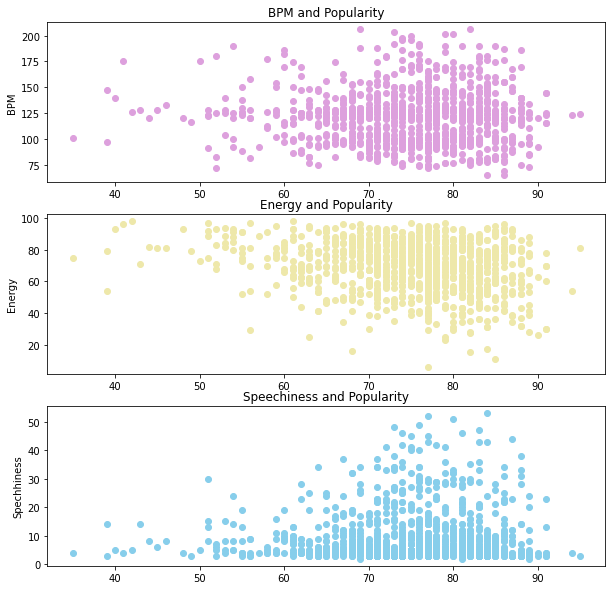

In [128]:
# Visualization 2010-2019

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
                                    ncols=1,
                                   figsize=(10,10))
bpm = ax0.scatter(data_2010_2019["pop"], 
                  data_2010_2019["bpm"],
                  c="plum");
ax0.set(title="BPM and Popularity",
       ylabel="BPM")
nrgy = ax1.scatter(data_2010_2019["pop"], 
                   data_2010_2019["nrgy"],
                  c="palegoldenrod");
ax1.set(title="Energy and Popularity",
       ylabel="Energy")

spch = ax2.scatter(data_2010_2019["pop"], 
                  data_2010_2019["spch"],
                  c="skyblue");
ax2.set(title="Speechiness and Popularity",
       ylabel="Spechhiness");

## 2020

In [129]:
data_2020

,sel,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Blinding Lights,The Weeknd,canadian contemporary r&b,2020-01-01,171,73,51,-6,9,33,200,0,6,93
1,2,Watermelon Sugar,Harry Styles,pop,2019-01-01,95,82,55,-4,34,56,174,12,5,90
2,3,Someone You Loved,Lewis Capaldi,pop,2019-01-01,110,41,50,-6,11,45,182,75,3,89
3,4,lovely (with Khalid),Billie Eilish,art pop,2018-01-01,115,30,35,-10,10,12,200,93,3,89
4,5,Mood (feat. iann dior),24kGoldn,cali rap,2021-01-01,91,72,70,-4,32,73,141,17,4,89
5,6,Circles,Post Malone,dfw rap,2019-01-01,120,76,70,-3,9,55,215,19,4,88
6,7,goosebumps,Travis Scott,rap,2016-01-01,130,73,84,-3,15,43,244,8,5,87
7,8,Lucid Dreams,Juice WRLD,chicago rap,2018-01-01,84,57,51,-7,34,22,240,35,20,87
8,9,Memories,Maroon 5,pop,2021-01-01,91,33,78,-7,8,60,189,84,6,87
9,10,bad guy,Billie Eilish,art pop,2019-01-01,135,43,70,-11,10,56,194,33,38,87


In [130]:
data_2020.head()

,sel,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,Blinding Lights,The Weeknd,canadian contemporary r&b,2020-01-01,171,73,51,-6,9,33,200,0,6,93
1,2,Watermelon Sugar,Harry Styles,pop,2019-01-01,95,82,55,-4,34,56,174,12,5,90
2,3,Someone You Loved,Lewis Capaldi,pop,2019-01-01,110,41,50,-6,11,45,182,75,3,89
3,4,lovely (with Khalid),Billie Eilish,art pop,2018-01-01,115,30,35,-10,10,12,200,93,3,89
4,5,Mood (feat. iann dior),24kGoldn,cali rap,2021-01-01,91,72,70,-4,32,73,141,17,4,89


In [131]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   sel        50 non-null     int64         
 1   title      50 non-null     object        
 2   artist     50 non-null     object        
 3   top genre  50 non-null     object        
 4   year       50 non-null     datetime64[ns]
 5   bpm        50 non-null     int64         
 6   nrgy       50 non-null     int64         
 7   dnce       50 non-null     int64         
 8   dB         50 non-null     int64         
 9   live       50 non-null     int64         
 10  val        50 non-null     int64         
 11  dur        50 non-null     int64         
 12  acous      50 non-null     int64         
 13  spch       50 non-null     int64         
 14  pop        50 non-null     int64         
dtypes: datetime64[ns](1), int64(11), object(3)
memory usage: 6.0+ KB


In [132]:
data_2020.isna().sum()

sel          0
title        0
artist       0
top genre    0
year         0
bpm          0
nrgy         0
dnce         0
dB           0
live         0
val          0
dur          0
acous        0
spch         0
pop          0
dtype: int64

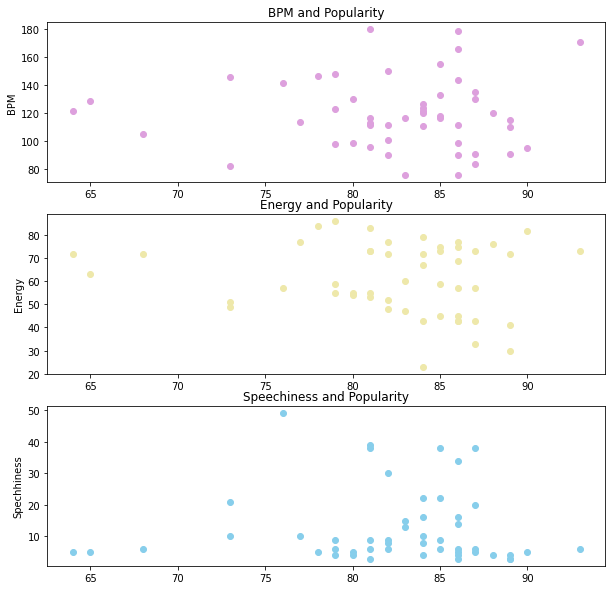

In [133]:
# Visualization 2020

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
                                    ncols=1,
                                   figsize=(10,10))
bpm = ax0.scatter(data_2020["pop"], 
                  data_2020["bpm"],
                  c="plum");
ax0.set(title="BPM and Popularity",
       ylabel="BPM")
nrgy = ax1.scatter(data_2020["pop"], 
                   data_2020["nrgy"],
                  c="palegoldenrod");
ax1.set(title="Energy and Popularity",
       ylabel="Energy")

spch = ax2.scatter(data_2020["pop"], 
                  data_2020["spch"],
                  c="skyblue");
ax2.set(title="Speechiness and Popularity",
       ylabel="Spechhiness");

## 2021

In [134]:
data_2021

,id,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Olivia Rodrigo,drivers license,5wANPM4fQCJwkGd4rN57mH,92,0.561,0.431,10,-8.810,1,0.0578,0.76800,0.000014,0.1060,0.1370,143.875,242013,4
1,2,Lil Nas X,MONTERO (Call Me By Your Name),1SC5rEoYDGUK4NfG82494W,90,0.593,0.503,8,-6.725,0,0.2200,0.29300,0.000000,0.4050,0.7100,178.781,137704,4
2,3,The Kid LAROI,STAY (with Justin Bieber),5PjdY0CKGZdEuoNab3yDmX,92,0.591,0.764,1,-5.484,1,0.0483,0.03830,0.000000,0.1030,0.4780,169.928,141806,4
3,4,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,95,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.6880,166.928,178147,4
4,5,Dua Lipa,Levitating (feat. DaBaby),5nujrmhLynf4yMoMtj8AQF,89,0.702,0.825,6,-3.787,0,0.0601,0.00883,0.000000,0.0674,0.9150,102.977,203064,4
5,6,Justin Bieber,Peaches (feat. Daniel Caesar & Giveon),4iJyoBOLtHqaGxP12qzhQI,90,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.4640,90.030,198082,4
6,7,Doja Cat,Kiss Me More (feat. SZA),3DarAbFujv6eYNliUTyqtz,88,0.764,0.705,8,-3.463,1,0.0284,0.25900,0.000089,0.1200,0.7810,110.970,208667,4
7,8,The Weeknd,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,93,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.3340,171.005,200040,4
8,9,Glass Animals,Heat Waves,02MWAaffLxlfxAUY7c5dvx,94,0.761,0.525,11,-6.900,1,0.0944,0.44000,0.000007,0.0921,0.5310,80.870,238805,4
9,10,Måneskin,Beggin',3Wrjm47oTz2sjIgck11l5e,93,0.714,0.800,11,-4.808,0,0.0504,0.12700,0.000000,0.3590,0.5890,134.002,211560,4


In [135]:
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50 non-null     int64  
 1   artist_name       50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   popularity        50 non-null     int64  
 5   danceability      50 non-null     float64
 6   energy            50 non-null     float64
 7   key               50 non-null     int64  
 8   loudness          50 non-null     float64
 9   mode              50 non-null     int64  
 10  speechiness       50 non-null     float64
 11  acousticness      50 non-null     float64
 12  instrumentalness  50 non-null     float64
 13  liveness          50 non-null     float64
 14  valence           50 non-null     float64
 15  tempo             50 non-null     float64
 16  duration_ms       50 non-null     int64  
 17 

In [136]:
data_2021.isna().sum()

id                  0
artist_name         0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

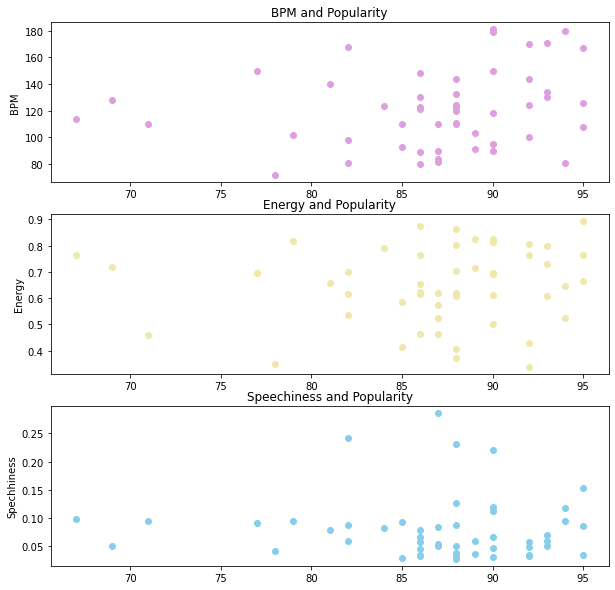

In [137]:
# Visualization 2021

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3,
                                    ncols=1,
                                   figsize=(10,10))
bpm = ax0.scatter(data_2021["popularity"], 
                  data_2021["tempo"],
                  c="plum");
ax0.set(title="BPM and Popularity",
       ylabel="BPM")
nrgy = ax1.scatter(data_2021["popularity"], 
                   data_2021["energy"],
                  c="palegoldenrod");
ax1.set(title="Energy and Popularity",
       ylabel="Energy")

spch = ax2.scatter(data_2021["popularity"], 
                  data_2021["speechiness"],
                  c="skyblue");
ax2.set(title="Speechiness and Popularity",
       ylabel="Spechhiness");

## Data Modelling

Because we are combining 3 different datasets, we need to make sure that the number and names of columns match. It means that we need to delete the columns that don't appear in all 3 datasets, and rename some of them. Also, we need to make sure that the measurements in the columns are the same. For example, in the dataset from 2021, the duration of the songs is measure in ms, while in the other two datasets the duration of the songs are measured in seconds. 

In [138]:
#Make a copy of og df
data = data_2010_2019.copy()

In [139]:
data.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009-01-01,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010-01-01,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010-01-01,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010-01-01,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010-01-01,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo


In [140]:
data_2010_2019.columns, data_2020.columns, data_2021.columns

(Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
        'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
        'artist type'],
       dtype='object'),
 Index(['sel', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
        'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
       dtype='object'),
 Index(['id', 'artist_name', 'track_name', 'track_id', 'popularity',
        'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'time_signature'],
       dtype='object'))

In [141]:
# Rename col names to match
data = data.rename(columns={"year released":"year"})
data_2021 = data_2021.rename(columns={"artist_name":"artist",
                         "track_name":"title",
                         "popularity":"pop",
                         "danceability":"dnce",
                         "energy":"nrgy",
                         "loudness":"dB",
                         "valence":"val",
                         "tempo":"bpm",
                         "duration_ms":"dur",
                         "liveness":"live",
                        "acousticness":"acous",
                        "speechiness":"spch"})

In [142]:
data.columns, data_2020.columns, data_2021.columns

(Index(['title', 'artist', 'top genre', 'year', 'added', 'bpm', 'nrgy', 'dnce',
        'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
        'artist type'],
       dtype='object'),
 Index(['sel', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy', 'dnce',
        'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
       dtype='object'),
 Index(['id', 'artist', 'title', 'track_id', 'pop', 'dnce', 'nrgy', 'key', 'dB',
        'mode', 'spch', 'acous', 'instrumentalness', 'live', 'val', 'bpm',
        'dur', 'time_signature'],
       dtype='object'))

In [143]:
#Drop unnecessary columns
data.drop(["added", "top year", "artist type", "top genre"], axis=1, inplace=True)
data_2020.drop(["sel", "top genre"], axis=1, inplace=True)
data_2021.drop(["id", "track_id", "key", "mode", "instrumentalness", "time_signature"
               ], axis=1, inplace=True)

In [144]:
data.info(), data_2020.info(), data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   1000 non-null   object        
 1   artist  1000 non-null   object        
 2   year    1000 non-null   datetime64[ns]
 3   bpm     1000 non-null   float64       
 4   nrgy    1000 non-null   float64       
 5   dnce    1000 non-null   float64       
 6   dB      1000 non-null   float64       
 7   live    1000 non-null   float64       
 8   val     1000 non-null   float64       
 9   dur     1000 non-null   float64       
 10  acous   1000 non-null   float64       
 11  spch    1000 non-null   float64       
 12  pop     1000 non-null   float64       
dtypes: datetime64[ns](1), float64(10), object(2)
memory usage: 102.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype         
---  ------ 

(None, None, None)

In [145]:
#Add missing columns to 2021
data_2021["year"] = "2021"

So we dropped some of the columns that don't appear in other datasets, and added the missing ones. That leaves us with 12 common columns:
* title
* artist
* year
* bpm
* nrgy
* dnce
* dB
* live
* val
* dur
* acous
* spch
* pop

In [146]:
data_2021.head()

,artist,title,pop,dnce,nrgy,dB,spch,acous,live,val,bpm,dur,year
0,Olivia Rodrigo,drivers license,92,0.561,0.431,-8.810,0.0578,0.76800,0.1060,0.137,143.875,242013,2021
1,Lil Nas X,MONTERO (Call Me By Your Name),90,0.593,0.503,-6.725,0.2200,0.29300,0.4050,0.710,178.781,137704,2021
2,The Kid LAROI,STAY (with Justin Bieber),92,0.591,0.764,-5.484,0.0483,0.03830,0.1030,0.478,169.928,141806,2021
3,Olivia Rodrigo,good 4 u,95,0.563,0.664,-5.044,0.1540,0.33500,0.0849,0.688,166.928,178147,2021
4,Dua Lipa,Levitating (feat. DaBaby),89,0.702,0.825,-3.787,0.0601,0.00883,0.0674,0.915,102.977,203064,2021


In [147]:
# Convert ms to s
data_2021["dur"] = data_2021["dur"]/1000

In [148]:
data_2021["dur"][:10]

0    242.013
1    137.704
2    141.806
3    178.147
4    203.064
5    198.082
6    208.667
7    200.040
8    238.805
9    211.560
Name: dur, dtype: float64

In [149]:
# match the measurements of 2021 dataset with the other two
data_2021[["dnce", "nrgy", "spch", "acous", "live", "val"]] = data_2021[["dnce", "nrgy", "spch", "acous", "live", "val"]] * 100

Now we are ready to concat the datasets together

In [150]:
data = pd.concat([data, data_2020, data_2021])

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1103 entries, 0 to 49
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1100 non-null   object 
 1   artist  1100 non-null   object 
 2   year    1100 non-null   object 
 3   bpm     1100 non-null   float64
 4   nrgy    1100 non-null   float64
 5   dnce    1100 non-null   float64
 6   dB      1100 non-null   float64
 7   live    1100 non-null   float64
 8   val     1100 non-null   float64
 9   dur     1100 non-null   float64
 10  acous   1100 non-null   float64
 11  spch    1100 non-null   float64
 12  pop     1100 non-null   float64
dtypes: float64(10), object(3)
memory usage: 120.6+ KB


In [152]:
data.head()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,2009-01-01 00:00:00,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0
1,My First Kiss (feat. Ke$ha),3OH!3,2010-01-01 00:00:00,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0
2,I Need A Dollar,Aloe Blacc,2010-01-01 00:00:00,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,2010-01-01 00:00:00,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,2010-01-01 00:00:00,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0


xdata.artist.value_counts()

In [153]:
data.artist.value_counts()

Taylor Swift         21
Drake                19
Calvin Harris        18
Ariana Grande        17
Bruno Mars           14
                     ..
Twenty One Pilots     1
Hot Chelle Rae        1
Anne-Marie            1
Astrid S              1
Sebastian Yatra       1
Name: artist, Length: 478, dtype: int64

In [154]:
data.isna().sum()

title     3
artist    3
year      3
bpm       3
nrgy      3
dnce      3
dB        3
live      3
val       3
dur       3
acous     3
spch      3
pop       3
dtype: int64

In [155]:
data = data.dropna()

In [156]:
data.isna().sum()

title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

In [157]:
# Turn object dtypes into categories

for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

/var/folders/4_/1qmrg5mj40l35qd8tr1_b5sh0000gn/T/ipykernel_28525/2671886736.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  data[label] = content.astype("category").cat.as_ordered()


In [158]:
data.head()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,STARSTRUKK (feat. Katy Perry),3OH!3,2009-01-01,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0
1,My First Kiss (feat. Ke$ha),3OH!3,2010-01-01,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0
2,I Need A Dollar,Aloe Blacc,2010-01-01,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,2010-01-01,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0
4,Nothin' on You (feat. Bruno Mars),B.o.B,2010-01-01,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 49
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   title   1100 non-null   category
 1   artist  1100 non-null   category
 2   year    1100 non-null   category
 3   bpm     1100 non-null   float64 
 4   nrgy    1100 non-null   float64 
 5   dnce    1100 non-null   float64 
 6   dB      1100 non-null   float64 
 7   live    1100 non-null   float64 
 8   val     1100 non-null   float64 
 9   dur     1100 non-null   float64 
 10  acous   1100 non-null   float64 
 11  spch    1100 non-null   float64 
 12  pop     1100 non-null   float64 
dtypes: category(3), float64(10)
memory usage: 160.8 KB


In [160]:
data.title.cat.categories

Index(['  7/11', '#SELFIE', '#thatPOWER', '...Ready For It?', '1-800-273-8255',
       '17', '1950', '2 On (feat. ScHoolboy Q)', '212', '22',
       ...
       'no tears left to cry', 'oui', 'positions',
       'rockstar (feat. 21 Savage)', 'telepatía', 'thank u, next', 'traitor',
       'we fell in love in october', 'when the party's over',
       'you broke me first'],
      dtype='object', length=1026)

In [161]:
data.title.cat.codes

0      706
1      555
2      386
3       25
4      590
      ... 
45     659
46     324
47      13
48    1025
49     625
Length: 1100, dtype: int16

In [162]:
# sort by popularity
data.sort_values(by=["pop"], inplace=True, ascending=False)

# keep date as a year only
data["year"] = pd.to_datetime(data["year"])
data["year"] = data.year.dt.year

data.head(20)

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
392,Sweater Weather,The Neighbourhood,2013,124.000,81.0,61.0,-3.000,10.00,40.00,240.000,5.000,3.00,95.0
13,Bad Habits,Ed Sheeran,2021,126.011,89.3,80.7,-3.745,36.60,53.70,230.747,4.510,3.47,95.0
3,good 4 u,Olivia Rodrigo,2021,166.928,66.4,56.3,-5.044,8.49,68.80,178.147,33.500,15.40,95.0
42,Woman,Doja Cat,2021,107.998,76.4,82.4,-4.175,11.70,88.10,172.627,8.880,8.54,95.0
22,Yonaguni,Bad Bunny,2021,179.951,64.8,64.4,-4.601,13.50,44.00,206.710,27.600,11.80,94.0
394,Another Love,Tom Odell,2013,123.000,54.0,45.0,-9.000,9.00,13.00,244.000,70.000,4.00,94.0
8,Heat Waves,Glass Animals,2021,80.870,52.5,76.1,-6.900,9.21,53.10,238.805,44.000,9.44,94.0
39,Need to Know,Doja Cat,2021,130.041,60.9,66.4,-6.509,9.26,19.40,210.560,30.400,7.07,93.0
0,Blinding Lights,The Weeknd,2020,171.000,73.0,51.0,-6.000,9.00,33.00,200.000,0.000,6.00,93.0
9,Beggin',Måneskin,2021,134.002,80.0,71.4,-4.808,35.90,58.90,211.560,12.700,5.04,93.0


In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 392 to 182
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   title   1100 non-null   category
 1   artist  1100 non-null   category
 2   year    1100 non-null   int64   
 3   bpm     1100 non-null   float64 
 4   nrgy    1100 non-null   float64 
 5   dnce    1100 non-null   float64 
 6   dB      1100 non-null   float64 
 7   live    1100 non-null   float64 
 8   val     1100 non-null   float64 
 9   dur     1100 non-null   float64 
 10  acous   1100 non-null   float64 
 11  spch    1100 non-null   float64 
 12  pop     1100 non-null   float64 
dtypes: category(2), float64(10), int64(1)
memory usage: 167.6 KB


In [171]:
data.head()

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
392,Sweater Weather,The Neighbourhood,2013,124.000,81.0,61.0,-3.000,10.00,40.0,240.000,5.00,3.00,95.0
13,Bad Habits,Ed Sheeran,2021,126.011,89.3,80.7,-3.745,36.60,53.7,230.747,4.51,3.47,95.0
3,good 4 u,Olivia Rodrigo,2021,166.928,66.4,56.3,-5.044,8.49,68.8,178.147,33.50,15.40,95.0
42,Woman,Doja Cat,2021,107.998,76.4,82.4,-4.175,11.70,88.1,172.627,8.88,8.54,95.0
22,Yonaguni,Bad Bunny,2021,179.951,64.8,64.4,-4.601,13.50,44.0,206.710,27.60,11.80,94.0


### Save pre-processed data

In [172]:
# Export current dataframe

data.to_csv("data/processed-data.csv",
                  index=False)

In [173]:
# Re-import pre-processed data

data = pd.read_csv("data/processed-data.csv")

data.head().T

,0,1,2,3,4
title,Sweater Weather,Bad Habits,good 4 u,Woman,Yonaguni
artist,The Neighbourhood,Ed Sheeran,Olivia Rodrigo,Doja Cat,Bad Bunny
year,2013,2021,2021,2021,2021
bpm,124.0,126.011,166.928,107.998,179.951
nrgy,81.0,89.3,66.4,76.4,64.8
dnce,61.0,80.7,56.3,82.4,64.4
dB,-3.0,-3.745,-5.044,-4.175,-4.601
live,10.0,36.6,8.49,11.7,13.5
val,40.0,53.7,68.8,88.1,44.0
dur,240.0,230.747,178.147,172.627,206.71


In [175]:
data.isna().sum()

title     0
artist    0
year      0
bpm       0
nrgy      0
dnce      0
dB        0
live      0
val       0
dur       0
acous     0
spch      0
pop       0
dtype: int64

In [176]:
# Check for non-numeric columns

for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)



title
artist


In [177]:
# Turn categorical variables into numbers

for label, content in data.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn categories into numbers
        data[label] = pd.Categorical(content).codes

In [178]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   1100 non-null   int16  
 1   artist  1100 non-null   int16  
 2   year    1100 non-null   int64  
 3   bpm     1100 non-null   float64
 4   nrgy    1100 non-null   float64
 5   dnce    1100 non-null   float64
 6   dB      1100 non-null   float64
 7   live    1100 non-null   float64
 8   val     1100 non-null   float64
 9   dur     1100 non-null   float64
 10  acous   1100 non-null   float64
 11  spch    1100 non-null   float64
 12  pop     1100 non-null   float64
dtypes: float64(10), int16(2), int64(1)
memory usage: 99.0 KB


In [179]:
data.astype(int)

,title,artist,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,816,419,2013,124,81,61,-3,10,40,240,5,3,95
1,69,117,2021,126,89,80,-3,36,53,230,4,3,95
2,1008,317,2021,166,66,56,-5,8,68,178,33,15,95
3,967,106,2021,107,76,82,-4,11,88,172,8,8,95
4,980,41,2021,179,64,64,-4,13,44,206,27,11,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,361,91,2010,175,96,51,-2,12,39,179,1,4,41
1096,490,91,2012,140,93,39,-1,35,48,207,2,5,40
1097,735,341,2010,147,54,72,-6,16,83,211,30,14,39
1098,660,24,2012,97,79,52,-5,70,68,200,5,3,39


## Building a machine learning model

Let's try a Random Forest Regressor

In [180]:
# Split the data

X = data.drop("pop", axis=1)
y = data["pop"]

# Split into train and test sets 
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# Split into train and validation sets
np.random.seed(42)
X_train, X_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size=0.25)

In [181]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

In [182]:
%%time

#Intsntiate model

model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

#Fit the model
model.fit(X_train, y_train)

CPU times: user 524 ms, sys: 71.9 ms, total: 596 ms
Wall time: 194 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [183]:
%%time
model.score(X_train, y_train)

CPU times: user 30.9 ms, sys: 10.5 ms, total: 41.4 ms
Wall time: 28.4 ms


0.8769595810603203

In [184]:
# Score model on val data
model.score(X_val, y_val)

0.03656556099089037

Yikes... Let's try Ridge

In [185]:
from sklearn.linear_model import Ridge

model = Ridge()

#Fit model
model.fit(X_train, y_train)

#Score model
model.score(X_train, y_train)

0.14404497155069662

SVR?

In [186]:
from sklearn.svm import SVR

model = SVR()

#Fit model
model.fit(X_train, y_train)

SVR()

In [187]:
#Score model
model.score(X_train, y_train)

-0.007919256900679184

Why is it getting worse and worse?

In [188]:
from sklearn import linear_model

model = linear_model.Lasso()
model.fit(X_train, y_train)

Lasso()

In [189]:
model.score(X_train, y_train)

0.14225909551224492

Try Random Forest again

In [190]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=41)

#Fit the model
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=41)

In [191]:
model.score(X_train, y_train)

0.8802814030111881

In [192]:
model.score(X_val, y_val)

0.038181958045558684

In [193]:
model.score(X_test, y_test)

0.010831626054143006

## Building an evaluation function

In [156]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

In [162]:
def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and true labels
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_val, val_preds),
             "Training RMSLE":rmsle(y_train, train_preds),
             "Valid RMSLE":rmsle(y_val, val_preds),
             "Training R^2":r2_score(y_train, train_preds),
             "Valid r^2":r2_score(y_val, val_preds)}
    return scores

In [163]:
show_score(model)

{'Training MAE': 2.5107999999999997,
 'Valid MAE': 6.334355626894952,
 'Training RMSLE': 0.049229919728802064,
 'Valid RMSLE': 0.11341446508115748,
 'Training R^2': 0.8711396259234554,
 'Valid r^2': 0.19619808145017592}

Okay, regression model doesn't seem to work. Maybe we should remodel the data to make it a classification problem.